In [368]:
#importing dependencies 
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [369]:
main_df = pd.read_csv("archive/Project data.csv")
main_df

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,2022/04/18 7:18:47 PM GMT+6,21.0,Male,In a relationship,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,2022/04/18 7:19:28 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,2022/04/18 7:25:58 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube;Pinterest,Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,2022/04/18 7:29:43 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram,More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,2022/04/18 7:33:31 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2022/05/14 5:33:57 PM GMT+6,15.0,Male,Single,School Student,School,Yes,Instagram;YouTube;Discord;Reddit,Between 4 and 5 hours,1,...,1,3,3,3,3,3,3,1,1,1
470,2022/05/15 2:48:02 AM GMT+6,20.0,Female,Single,University Student,Company,Yes,Instagram;YouTube;Snapchat;Discord;Reddit;Pint...,Between 1 and 2 hours,2,...,1,3,5,3,5,1,2,5,4,5
471,2022/05/16 8:20:30 PM GMT+6,20.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,More than 5 hours,5,...,2,4,5,3,1,3,2,4,3,4
472,2022/05/17 5:12:19 PM GMT+6,35.0,Female,Married,Salaried Worker,Company,Yes,Facebook;Instagram;YouTube,Between 1 and 2 hours,3,...,2,3,3,2,1,2,2,2,4,4


In [370]:
def relabel_averageTime(row):
    if row['8. What is the average time you spend on social media every day?'] in ['Less than an Hour','Between 1 and 2 hours', 'Between 2 and 3 hours']:
        return '0-3 hours'
    elif row['8. What is the average time you spend on social media every day?'] in ['Between 3 and 4 hours', 'Between 4 and 5 hours']:
        return '3-5 hours'
    elif row['8. What is the average time you spend on social media every day?'] in ['More than 5 hours']:
        return '5+ hours'

#Run the apply method to df for each row calling relabel function
main_df['Average Time on Social Media'] = main_df.apply(lambda row: relabel_averageTime(row), axis=1)

#Remove Old Column
del main_df['8. What is the average time you spend on social media every day?']



In [377]:
#Keep only rows who use social media
main_df = main_df.loc[main_df["6. Do you use social media?"]=="Yes",:]


In [378]:
column_list = main_df.columns.tolist()
print(column_list)

['Timestamp', '1. What is your age?', '2. Gender', '3. Relationship Status', '4. Occupation Status', '5. What type of organizations are you affiliated with?', '6. Do you use social media?', '7. What social media platforms do you commonly use?', '9. How often do you find yourself using Social media without a specific purpose?', '10. How often do you get distracted by Social media when you are busy doing something?', "11. Do you feel restless if you haven't used Social media in a while?", '12. On a scale of 1 to 5, how easily distracted are you?', '13. On a scale of 1 to 5, how much are you bothered by worries?', '14. Do you find it difficult to concentrate on things?', '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?', '16. Following the previous question, how do you feel about these comparisons, generally speaking?', '17. How often do you look to seek validation from features of social media?', '18. How often do you f

In [379]:
#main_df

Age Groups Surveyed

In [380]:
ages_surveyed = main_df.iloc[:, 1].value_counts()
#print(ages_surveyed.head(10))
print(ages_surveyed.tail(10))

45.0    1
42.0    1
31.0    1
69.0    1
91.0    1
43.0    1
26.7    1
52.0    1
60.0    1
55.0    1
Name: 1. What is your age?, dtype: int64


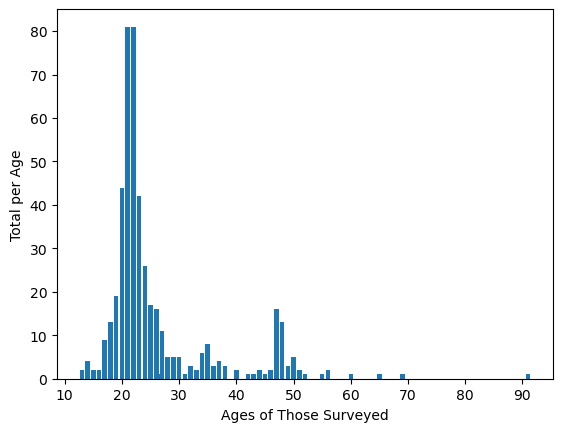

In [381]:
# Initial bar chart showing age distribution of those surveyed
plt.bar(ages_surveyed.index.values,ages_surveyed.values)

# Rotate drug names for readability
plt.xticks(rotation=0)

# X and Y axis names
plt.xlabel("Ages of Those Surveyed")
plt.ylabel("Total per Age")
plt.show()


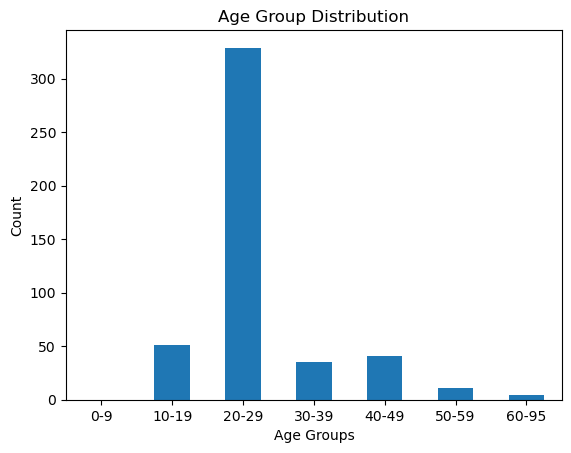

In [388]:
# Custom age ranges
bins = [0, 9, 19, 29, 39, 49, 59, float('inf')]

# Labels for the age groups
labels = ['0-9', '10-19', '20-29', '30-39','40-49','50-59', '60-95']  

main_df['Age Groups'] = pd.cut(main_df['1. What is your age?'], bins=bins, labels=labels,include_lowest=True)

# Count the number of individuals in each age group
age_group_counts = main_df['Age Groups'].value_counts()

# List ascending age groups 
age_group_counts=age_group_counts.sort_index()

# Plotting the bar chart
age_group_counts.plot(kind='bar')

# Adding some personality to the chart
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.xticks(rotation=0)

# Display the chart
plt.show()

Genders Surveyed

In [389]:
# Catalogue all genders surveyed
genders_surveyed = set(main_df['2. Gender'])
print(genders_surveyed)

{'Female', 'Others', 'Male'}


In [390]:
# Create an "Others" group so results fall under "Male", "Female", or "Other"
main_df.replace('unsure ','Others', inplace=True)
main_df.replace('There are others???','Others', inplace=True)
main_df.replace('NB','Others', inplace=True)
main_df.replace('Trans','Others', inplace=True)
main_df.replace('Non binary ','Others', inplace=True)
main_df.replace('Nonbinary ','Others', inplace=True)
main_df.replace('Non-binary','Others', inplace=True)

genders_surveyed = set(main_df['2. Gender'])
print(genders_surveyed)

{'Female', 'Others', 'Male'}


In [391]:
# Counts for each gender category
gender_counts = main_df['2. Gender'].value_counts()
gender_counts

Female    259
Male      205
Others      7
Name: 2. Gender, dtype: int64

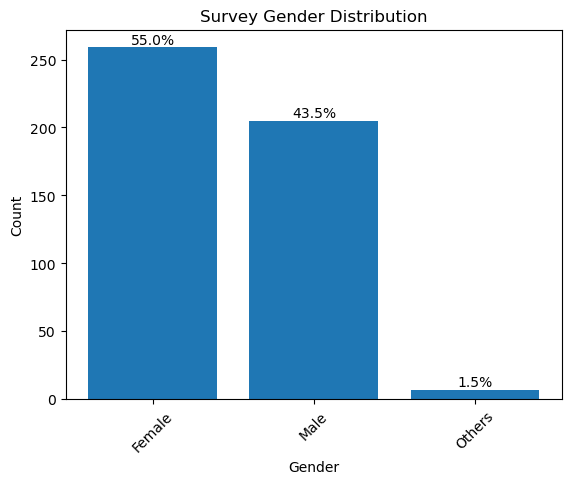

In [392]:
genders_surveyed = main_df['2. Gender'].value_counts()

# Plotting the bar chart
plt.bar(gender_counts.index, gender_counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survey Gender Distribution')

# Rotating x-axis labels 
plt.xticks(rotation=45)

# Adding percentagess to bar chart
total = gender_counts.sum()
for i, count in enumerate(gender_counts):
    percentage = count / total * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

In [393]:
main_df

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,...,"13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?",Average Time on Social Media,Age Groups
0,2022/04/18 7:18:47 PM GMT+6,21.0,Male,In a relationship,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,5,3,...,2,5,2,3,2,5,4,5,0-3 hours,20-29
1,2022/04/18 7:19:28 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,4,3,...,5,4,5,1,1,5,4,5,5+ hours,20-29
2,2022/04/18 7:25:58 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube;Pinterest,3,2,...,5,4,3,3,1,4,2,5,3-5 hours,20-29
3,2022/04/18 7:29:43 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram,4,2,...,5,3,5,1,2,4,3,2,5+ hours,20-29
4,2022/04/18 7:33:31 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,3,5,...,5,5,3,3,3,4,4,1,0-3 hours,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2022/05/14 5:33:57 PM GMT+6,15.0,Male,Single,School Student,School,Yes,Instagram;YouTube;Discord;Reddit,1,1,...,3,3,3,3,3,1,1,1,3-5 hours,10-19
470,2022/05/15 2:48:02 AM GMT+6,20.0,Female,Single,University Student,Company,Yes,Instagram;YouTube;Snapchat;Discord;Reddit;Pint...,2,2,...,5,3,5,1,2,5,4,5,0-3 hours,20-29
471,2022/05/16 8:20:30 PM GMT+6,20.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,5,4,...,5,3,1,3,2,4,3,4,5+ hours,20-29
472,2022/05/17 5:12:19 PM GMT+6,35.0,Female,Married,Salaried Worker,Company,Yes,Facebook;Instagram;YouTube,3,2,...,3,2,1,2,2,2,4,4,0-3 hours,30-39
